# Titanic
- Created by Gabriel Wong
- Content:
    - Data Cleaning
        - Target: Survived {0, 1} (perished, survived)
    - Exploratory Data Analysis
    - Statistical Modeling
        - Performance
            - Cross-validation:     &emsp; &emsp;                                   ROC_AUC (0.936), f1 (0.874), Accuracy (0.874), Precision (0.878), Recall (0.874)
            - Test set:             &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;       ROC_AUC (0.818), f1 (0.823), Accuracy (0.818), Precision (0.825), Recall (0.822) 
        - Top 3 factors
            - Sex
            - Pclass (Seating Class)
            - Relatives (Number of Siblings/Spouse + Number of Parents/Children)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_style("white")
warnings.filterwarnings('ignore')

# Import script
import ml

## Data Cleaning
- Sections:
    - Load Data
    - Set Target & Train-Test Split
    - Clean Data

### Load Data

In [3]:
# Load data
fname = '1_titanic'
df = pd.read_csv('0Data/'+fname+'.csv')

df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Set Target & Train-Test Split

In [4]:
# Set general parameters
reg_cla = 0     # Regression (1) or Classification (0)
rand_st = 42    # Random state
q = 3           # Quantile cut

# Set target
target = 'Survived'

In [5]:
# Sample large dataset - Yes (1) or No (0)
sample_y_n = 0
df_ = ml.data_sample(reg_cla, df, target, sample_y_n, rand_st, q, sample_frac=0.1)

# Split dataset into train and test - Yes (1) or No (0)
tset_y_n = 1
X_train, X_test, y_train, y_test, mod_label, y_class = ml.train_test(reg_cla, df_, target, 
                                                                     tset_y_n, rand_st, q, 
                                                                     tset_size=0.1)   
print(X_train.shape, X_test.shape, mod_label, y_class)

(801, 11) (90, 11) [0, 1] [0 1]


In [6]:
# New data copy
df2 = X_train.copy()
df2[target] = y_train

# Show basic data info. - raw data
data_inf = ml.data_info(df2)
df2.head(3)

---------- Data Shape ----------
Data:	 (801, 12)


---------- General Data Info. ----------
            Unique Count   Dtypes Null Null %
PassengerId    801   801    int64    0    0.0
Name           801   801   object    0    0.0
Ticket         625   801   object    0    0.0
Fare           237   801  float64    0    0.0
Cabin          136   181   object  620   77.4
Age             86   640  float64  161   20.1
SibSp            7   801    int64    0    0.0
Parch            7   801    int64    0    0.0
Pclass           3   801    int64    0    0.0
Embarked         3   799   object    2    0.2
Sex              2   801   object    0    0.0
Survived         2   801    int64    0    0.0


---------- Nulls ----------
         Unique   Dtypes Null Null %
Cabin       136   object  620   77.4
Age          86  float64  161   20.1
Embarked      3   object    2    0.2


---------- Basic statistics - Object and Number ----------
--- Object ---
         unique count                                  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
86,87,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S,0
329,330,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C,1
517,518,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q,0


### Clean Data

In [7]:
# Column removal, if required
## Remove Nulls
null_threshold = 25     # Any attributes with more than null_threshold will be removed 
null_feat = data_inf['Null %'][data_inf['Null %'] > null_threshold].\
            sort_values(ascending=False).index.values 
df2.drop(null_feat, axis=1, errors='ignore', inplace=True)

# Show basic data info. - cleaned data
_ = ml.data_info(df2)
df2.head(3)

---------- Data Shape ----------
Data:	 (801, 11)


---------- General Data Info. ----------
            Unique Count   Dtypes Null Null %
PassengerId    801   801    int64    0    0.0
Name           801   801   object    0    0.0
Ticket         625   801   object    0    0.0
Fare           237   801  float64    0    0.0
Age             86   640  float64  161   20.1
SibSp            7   801    int64    0    0.0
Parch            7   801    int64    0    0.0
Pclass           3   801    int64    0    0.0
Embarked         3   799   object    2    0.2
Sex              2   801   object    0    0.0
Survived         2   801    int64    0    0.0


---------- Nulls ----------
         Unique   Dtypes Null Null %
Age          86  float64  161   20.1
Embarked      3   object    2    0.2


---------- Basic statistics - Object and Number ----------
--- Object ---
         unique count                                       top freq  freq %
Name        801   801  Kelly, Miss. Anna Katherine "Annie Kat

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
86,87,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,S,0
329,330,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,C,1
517,518,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,Q,0


---------- Target distribution - Classification ----------


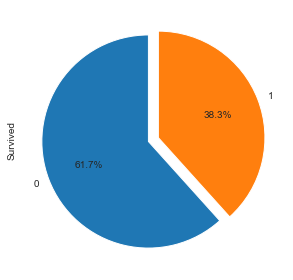

0    0.616729
1    0.383271
Name: Survived, dtype: float64 



In [8]:
# Show target distribution
## Classification
print('-'*10, 'Target distribution - Classification', '-'*10)
df2[target].value_counts().plot.pie(autopct="%.1f%%", 
                                    explode=[0.05] * len(mod_label), 
                                    startangle=90)
plt.tight_layout()
plt.savefig('1Images/0target_distribution.png', dpi=100)
plt.show()
print(df2[target].value_counts(1), '\n')

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

## Exploratory Data Analysis

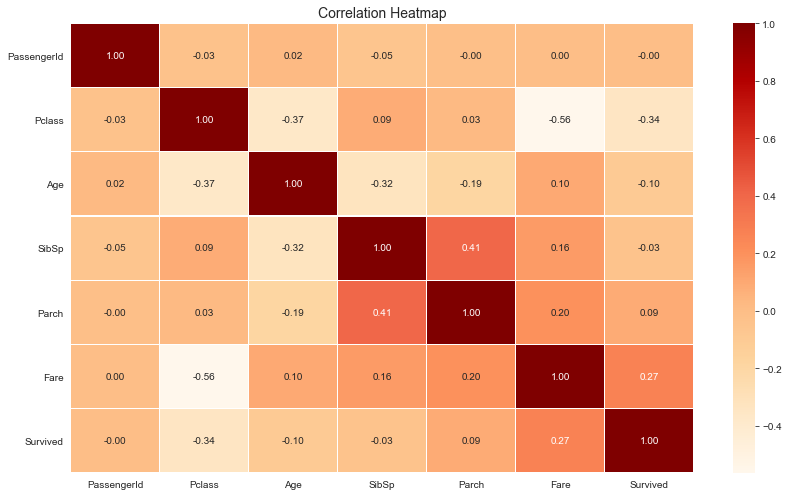

In [9]:
# Correlation heatmap
plt.figure(figsize=(12,7))
parameters = {'axes.labelsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(parameters)

sns.heatmap(df2.corr(), annot=True, fmt=".2f", linewidths=.1, cmap='OrRd')
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.savefig('1Images/1Correlation_1.png', dpi=100)

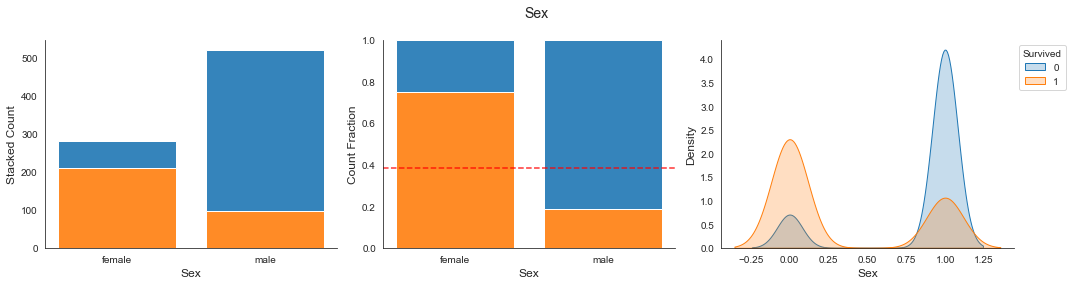

In [11]:
# Plots for categorical attributes
ml.hist_cat(df2, 'Sex', target, fsize=(15, 4), rotate=False, palette='tab10')
plt.savefig('1Images/1Sex.png', dpi=100)

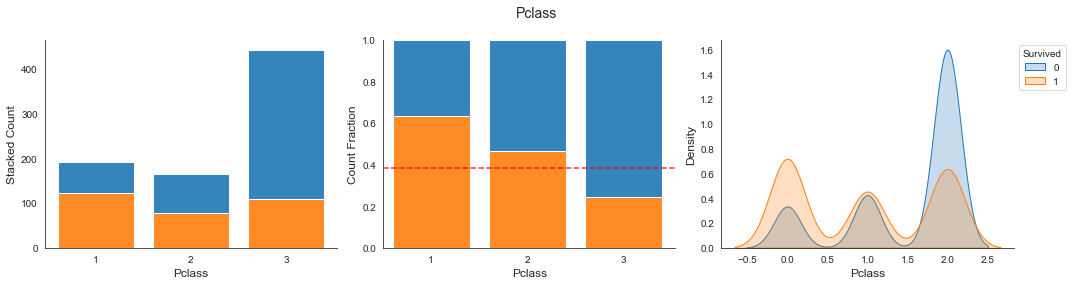

In [12]:
# Plots for categorical attributes
ml.hist_cat(df2, 'Pclass', target, fsize=(15, 4), rotate=False, palette='tab10')
plt.savefig('1Images/1Pclass.png', dpi=100)

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

## Statistical Modeling
- Sections:
    - Part 1: Improve Baseline Performance
        - Feature Engineering
        - Categorize Numerical and Categorical Attributes
        - Preprocess Data, Oversampling, Cross-validation
        - Model Optimization
        - Results
        - Feature Importance    
        - Additional Plots
    - Part 2: Evaluate Test Set
        - Results

### Part 1: Improve Baseline Performance

#### (Part 1) Feature Engineering

In [8]:
# New copy of data
df4 = df2.drop(target, axis=1, errors='ignore').copy()

# Show basic data info.
_ = ml.data_info(df4)
df4.head(3)

---------- Data Shape ----------
Data:	 (801, 10)


---------- General Data Info. ----------
            Unique Count   Dtypes Null Null %
PassengerId    801   801    int64    0    0.0
Name           801   801   object    0    0.0
Ticket         625   801   object    0    0.0
Fare           237   801  float64    0    0.0
Age             86   640  float64  161   20.1
SibSp            7   801    int64    0    0.0
Parch            7   801    int64    0    0.0
Pclass           3   801    int64    0    0.0
Embarked         3   799   object    2    0.2
Sex              2   801   object    0    0.0


---------- Nulls ----------
         Unique   Dtypes Null Null %
Age          86  float64  161   20.1
Embarked      3   object    2    0.2


---------- Basic statistics - Object and Number ----------
--- Object ---
         unique count                                       top freq  freq %
Name        801   801  Kelly, Miss. Anna Katherine "Annie Kate"    1    0.12
Ticket      625   801         

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
86,87,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,S
329,330,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,C
517,518,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,Q


In [9]:
# Execute clean1 and clean2 - Feature Engineering
clean1_ = ml.clean1()
clean1_.fit(df4, y_train)
df4_ = clean1_.transform(df4)

clean2_ = ml.clean2()
df4_ = clean2_.fit_transform(df4_)

# Show basic data info.
_, ml.data_info(df4_)
df4_.head(3)

Ticket
Vocabulary size: 18 ; Unique # tokens: 5
['soton' 'pc' 'pp' 'paris' 'ston'] 

---------- Data Shape ----------
Data:	 (801, 10)


---------- General Data Info. ----------
            Unique Count   Dtypes Null Null %
Fare           237   801  float64    0    0.0
Age             86   640  float64  161   20.1
Title           16   801    int64    0    0.0
Relatives        9   801    int64    0    0.0
SibSp            7   801    int64    0    0.0
Parch            7   801    int64    0    0.0
Ticket_text      6   801    int64    0    0.0
Embarked         4   801    int64    0    0.0
Pclass           3   801    int64    0    0.0
Sex              2   801    int64    0    0.0


---------- Nulls ----------
    Unique   Dtypes Null Null %
Age     86  float64  161   20.1


---------- Basic statistics - Object and Number ----------


--- Number ---
             count   mean    std   min   25%    50%    75%     max  skew  kurtosis
Pclass       801.0   2.31   0.83  1.00   2.0   3.00   3.00   

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Relatives,Ticket_text
86,3,2,16.0,1,3,34.3750,3,11,4,0
329,1,1,16.0,0,1,57.9792,1,9,1,0
517,3,2,NaN,0,0,24.1500,2,11,0,0


#### (Part 1) Categorize Numerical and Categorical Attributes

In [10]:
# Categorize attributes into numerical, categorical, and trim buckets
num_feat, cat_feat = ml.num_cat_split(df4_, num_to_cat_uniq=1, trim_uniq_cat=35)  

Extra trim       :  []
Num_feat         :  ['Embarked' 'Relatives' 'Age' 'SibSp' 'Title' 'Parch' 'Sex' 'Pclass'
 'Ticket_text' 'Fare']
Cat_feat         :  []


#### (Part 1) Preprocess Data, Load Models, Sampling, Cross-Validation

In [11]:
# Preprocess training data
preprocessor_ = ml.pipeline(reg_cla, 'median', num_feat, cat_feat, rand_st)
X_train2 = preprocessor_.fit_transform(df4_)
y_train2 = y_train.copy()
print(X_train2.shape)

(801, 10)


In [12]:
# Load models 
model = ml.models(reg_cla, rand_st)

# Oversampling
if reg_cla:
    X_train3, y_train3 = (X_train2, y_train2.copy()) 
else:
    X_train3, y_train3 = ml.oversample_random(X_train2, y_train2, rand_st, strategy='auto')
print(X_train3.shape)  

# Scoring metrics   
## Metrics for regression and classification
roc_metric = 'roc_auc_ovo' if len(mod_label) > 2 else 'roc_auc'     # multi-class and binary-class
reg_score = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']
cla_score = [roc_metric, 'f1_macro', 'balanced_accuracy', 'precision_macro', 'recall_macro']

## Name for table reporting
reg_score_name = ['rmse', 'mae', 'r2']
cla_score_name = ['roc_auc', 'f1', 'balanced_accuracy', 'precision', 'recall']

type_ = reg_score if reg_cla else cla_score
type_2 = reg_score_name if reg_cla else cla_score_name

str_add = ['test_']
score_type = [u + k for u in str_add for k in type_]

(988, 10)


#### (Part 1) Model Optimization

In [14]:
# Optimize model - RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV  
from scipy.stats import reciprocal, randint 

start = time.time()
param_distribs = {'n_estimators': randint(low=100, high=500),       
                  'max_depth': randint(low=3, high=7),
                  'min_child_weight': randint(low=1, high=4),
                  'learning_rate': reciprocal(0.13, 0.3),
                 }

rnd_search = RandomizedSearchCV(model['XGBC'], param_distributions=param_distribs,
                                n_iter=10, cv=10, scoring=type_, n_jobs=-1,
                                random_state=rand_st, refit=type_[0])
rnd_search.fit(X_train3, y_train3)
end = time.time() - start
print('Time taken:', end,'\n')

rnd_search.best_score_, rnd_search.best_params_

Time taken: 41.46662974357605 



(0.9360112453144523,
 {'learning_rate': 0.16766306917837714,
  'max_depth': 4,
  'min_child_weight': 1,
  'n_estimators': 335})

#### (Part 1) Results

In [29]:
# Cross validation - optimized model
import time 
from sklearn.model_selection import cross_validate  

start = time.time()
scores4 = cross_validate(rnd_search.best_estimator_, X_train3, y_train3, 
                         scoring=type_, cv=10, n_jobs=-1)   
end = time.time() - start
print('Time taken:', round(end, 2), 's\n')

## Display scores
scores_data = pd.read_csv('2Results/scores_tbl.csv', index_col=0)   
scores4_ = pd.DataFrame.from_dict(scores4)
scores_data['XGBC-opt-2'] = np.round(scores4_.mean()[2:].values, 3)
scores_data      

Time taken: 5.41 s



,LogC,XGBC,XGBC-opt,XGBC-opt-2
roc_auc,0.857,0.928,0.931,0.936
f1,0.788,0.866,0.870,0.874
balanced_accuracy,0.789,0.866,0.870,0.874
precision,0.791,0.872,0.874,0.878
recall,0.789,0.866,0.870,0.874


In [142]:
# --- Extra Spacing ---

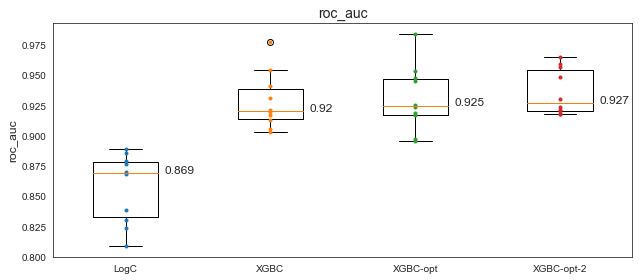

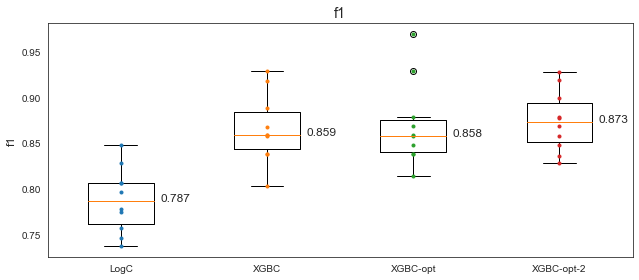

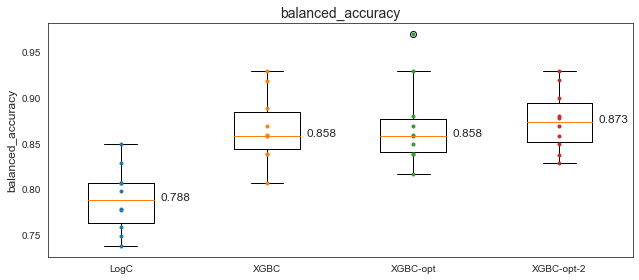

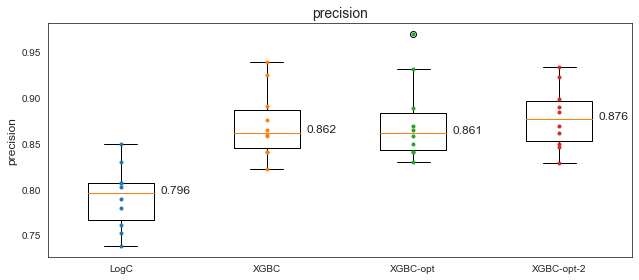

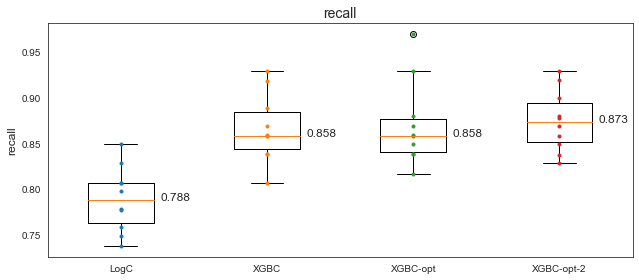

In [30]:
# Load previous scores      
scores1 = pd.read_csv('2Results/scores1.csv')
scores2 = pd.read_csv('2Results/scores2.csv')
scores3 = pd.read_csv('2Results/scores3.csv')

# Boxplots for cross validation results
for i in range(len(score_type)):
    ml.box_result(name=type_2[i], 
                  scores=np.c_[scores1[score_type[i]], scores2[score_type[i]], \
                               scores3[score_type[i]], scores4[score_type[i]]], \
                  labels=scores_data.columns, 
                  fsize=(9, 4), cv=10, x_offset=0.27, twinx=False)
    plt.savefig('1Images/2'+ type_2[i] +'.png', dpi=100)               

In [19]:
# Model fit
clf_ = rnd_search.best_estimator_
clf_.fit(X_train3, y_train3)
X_train3.shape

(988, 10)

#### (Part 1) Feature Importance

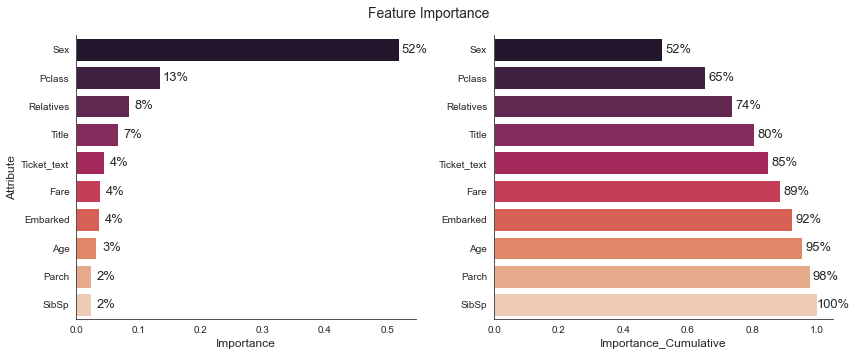

In [21]:
# Feature Importance
ml.feat_imp(num_feat, cat_feat, preprocessor_, clf_, fsize=(12, 5), 
            top=X_train3.shape[1], x1_adj=0.025, x2_adj=0.05, palette='rocket')
plt.savefig('1Images/3Feature_Importance.png', dpi=100)

#### (Part 1) Additional Plots

In [22]:
# Data for plotting
df5 = df4_.copy()
df5[target] = y_train.copy()

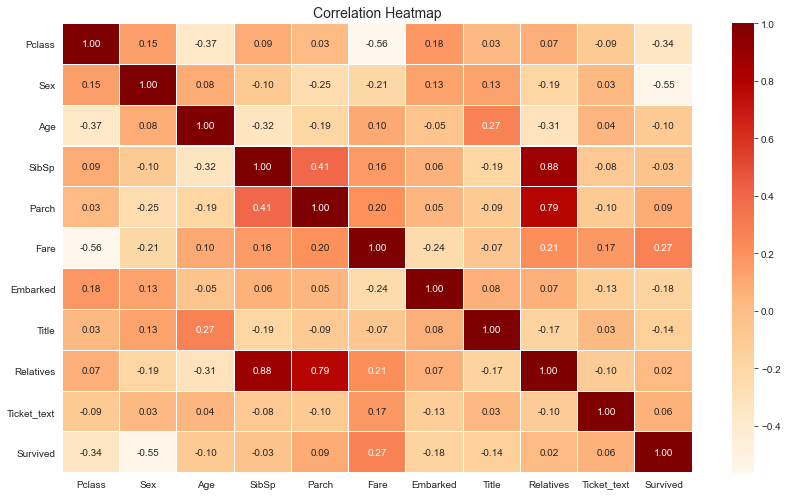

In [23]:
# Correlation heatmap
plt.figure(figsize=(12,7))
parameters = {'axes.labelsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(parameters)

sns.heatmap(df5.corr(), annot=True, fmt=".2f", linewidths=.1, cmap='OrRd')
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.savefig('1Images/1Correlation_2.png', dpi=100)

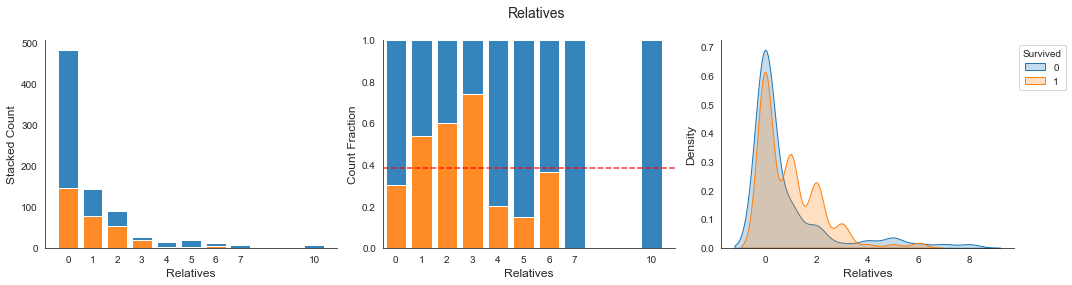

In [24]:
# Plots for categorical attributes
ml.hist_cat(df5, 'Relatives', target, fsize=(15, 4), rotate=False, palette='tab10')
plt.savefig('1Images/1Relatives.png', dpi=100)

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

### Part 2: Evaluate Test Set

#### (Part 2) Results

In [25]:
''' Improved Optimized Model '''
# New copy of data
df_test = X_test.copy()

# Execute clean1 and clean2 on Test
df_test = clean1_.transform(df_test)
df_test = clean2_.transform(df_test)

# Preprocess test data
X_test2 = preprocessor_.transform(df_test)
y_test2 = y_test.copy()
print(X_test2.shape)

(90, 10)


------ Scores ------
                    LogC   XGBC  XGBC-opt  XGBC-opt-2  Test_set
roc_auc            0.857  0.928     0.931       0.936     0.818
f1                 0.788  0.866     0.870       0.874     0.823
balanced_accuracy  0.789  0.866     0.870       0.874     0.818
precision          0.791  0.872     0.874       0.878     0.825
recall             0.789  0.866     0.870       0.874     0.822 

------ Classification Report ------
              precision  recall  f1-score  support
0                 0.868   0.836     0.852   55.000
1                 0.757   0.800     0.778   35.000
accuracy          0.822   0.822     0.822    0.822
macro avg         0.812   0.818     0.815   90.000
weighted avg      0.825   0.822     0.823   90.000 




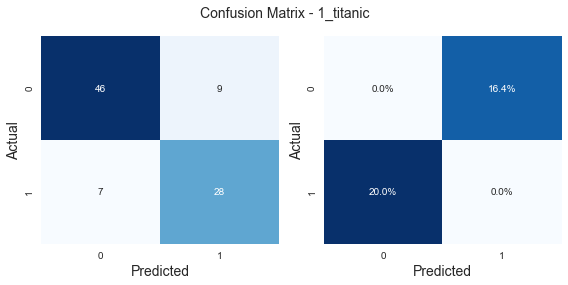

In [26]:
# Predict test - Improved optimized model
y_test_pred = clf_.predict(X_test2)
y_test_pred_proba = 0 if reg_cla else clf_.predict_proba(X_test2)

# Classification
if not reg_cla:
    # Test scores
    test_scores = ml.test_metric(reg_cla, y_test2, y_test_pred, y_test_pred_proba, mod_label)
    scores_data['Test_set'] = test_scores
    scores_data.to_csv('2Results/scores_tbl2.csv')
    print('------ Scores ------') 
    print (scores_data, '\n')

    # Confusion Matrix
    ml.conf_matrix(fname, y_test2, y_test_pred, y_class, fsize=(8, 4), cmap='Blues')
    plt.savefig('1Images/3Confusion_Matrix_Test.png', dpi=100)

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---

In [ ]:
# --- Section End ---